# Análise de dados - Curva característica do diodo e do painel solar

In [457]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.optimize import curve_fit

In [458]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_theme()

## Diodo

In [509]:
df_diodo = pd.read_csv('./Dados/diodo.csv')

In [510]:
df_diodo.describe()

,Tempo,Tensao A,Tensao B,Corrente
count,369.000000,369.000000,369.000000,3.690000e+02
mean,9.200000,0.055600,1.568553,1.684702e-04
std,5.333268,0.087101,0.861819,2.638973e-04
min,0.000000,0.000156,0.037000,4.730000e-07
25%,4.600000,0.000436,0.799000,1.320000e-06
50%,9.200000,0.000726,1.644000,2.200000e-06
75%,13.800000,0.131000,2.512000,3.960000e-04
max,18.400000,0.208000,2.537000,6.290000e-04


In [475]:
R = 330.2, 0.1	# Resistência e incerteza

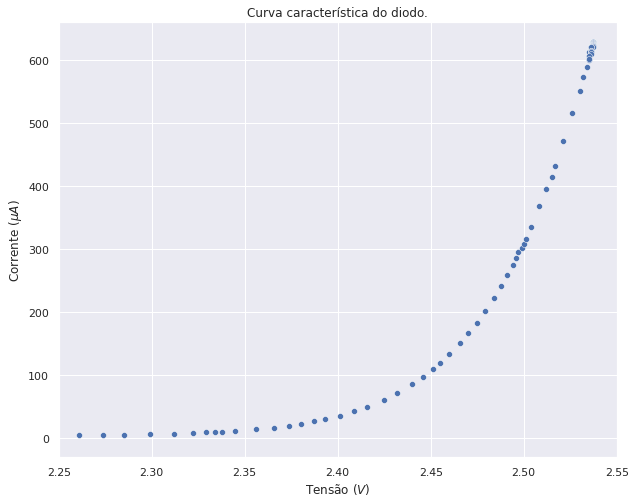

In [476]:
plt.title('Curva característica do diodo.')
sns.scatterplot(x=df_diodo['Tensao B'], y=df_diodo['Corrente'] * 1E6)

plt.xlabel('Tensão ($V$)')
plt.ylabel('Corrente ($\mu A$)')
plt.xlim(2.25, 2.55)
plt.show()

In [511]:
def exponential(x, b, c): return np.exp(b * (x - c))

In [512]:
fits = [ [], [] ]

In [513]:
fits[0] = curve_fit(
	exponential,
	xdata=df_diodo['Tensao B'][250:],
	ydata=df_diodo['Corrente'][250:]
	)

In [514]:
fits[1] = curve_fit(
	exponential,
	xdata=df_diodo['Tensao B'][:201],
	ydata=df_diodo['Corrente'][:201]
)

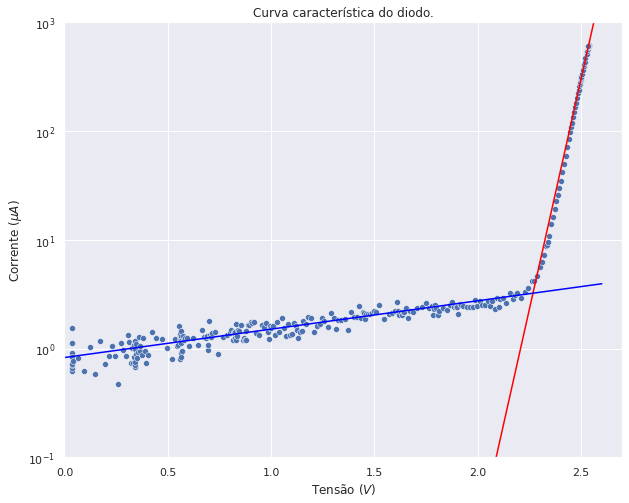

In [515]:
plt.title('Curva característica do diodo.')
sns.scatterplot(x=df_diodo['Tensao B'], y=df_diodo['Corrente'] * 1E6)

x = np.linspace(0, 2.6, 1000)
sns.lineplot(x=x, y=exponential(x, fits[0][0][0], fits[0][0][1])*1E6, color='red')
sns.lineplot(x=x, y=exponential(x, fits[1][0][0], fits[1][0][1])*1E6, color='blue')

plt.xlabel('Tensão ($V$)')
plt.ylabel('Corrente ($\mu A$)')
plt.xlim(0, 2.7)
plt.ylim(1E-1, 1E3)
plt.yscale('log')
plt.show()

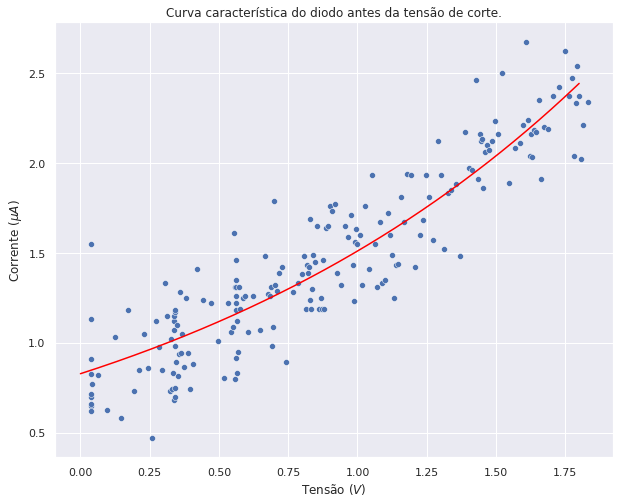

In [504]:
sns.scatterplot(x=df_diodo['Tensao B'][:201], y=df_diodo['Corrente'][:201]*1E6)
x = np.linspace(0, 1.8, 1000)
sns.lineplot(x=x, y=exponential(x, fits[1][0][0], fits[1][0][1])*1E6, color='red')
plt.xlabel('Tensão ($V$)')
plt.ylabel('Corrente ($\mu A$)')
plt.title('Curva característica do diodo antes da tensão de corte.')
plt.show()

In [484]:
sigma_y = df_diodo['Corrente'][:201] - exponential(df_diodo['Tensao B'][:201], fits[1][0][0], fits[1][0][1])[:201]

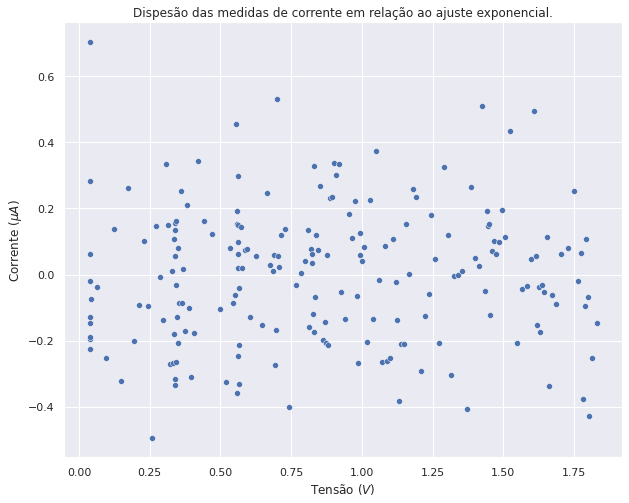

In [485]:
sns.scatterplot(x=df_diodo['Tensao B'][:201], y=sigma_y*1E6)
x = np.linspace(0, 1.8, 1000)
plt.xlabel('Tensão ($V$)')
plt.ylabel('Corrente ($\mu A$)')
plt.title('Dispersão das medidas de corrente em relação ao ajuste exponencial.')
plt.show()

In [497]:
print(f'Incerteza da corrente:\t{sigma_y.std()} muA')

Incerteza da corrente:	2.0484075014121447e-07 muA


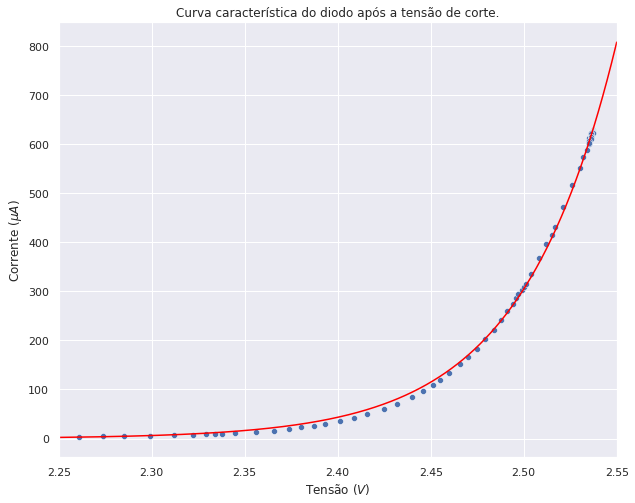

In [506]:
plt.title('Curva característica do diodo após a tensão de corte.')

sns.scatterplot(x=df_diodo['Tensao B'][200:], y=df_diodo['Corrente'][200:]*1E6)

x = np.linspace(2.25, 2.55, 1000)
sns.lineplot(x=x, y=exponential(x, fits[0][0][0], fits[0][0][1])*1E6, color='red')

plt.xlabel('Tensão ($V$)')
plt.ylabel('Corrente ($\mu A$)')
plt.xlim(2.25, 2.55)
plt.show()

In [507]:
np.sum( ( df_diodo['Corrente'][250:] - np.exp(fits[0][0][0]*(df_diodo['Tensao B'][250:]-fits[0][0][1])) )**2 / (sigma_y.std())**2 ) / (df_diodo[250:].shape[0] - 2)

601.3056801001022

## Painel Solar